<a href="https://colab.research.google.com/github/ankitajkit/Market-Index-Prediction/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv")

count     2667.000000
mean      8261.834986
std       2581.268450
min       4544.200195
25%       5817.650147
50%       8129.350098
75%      10471.750000
max      15314.700200
Name: Close, dtype: float64


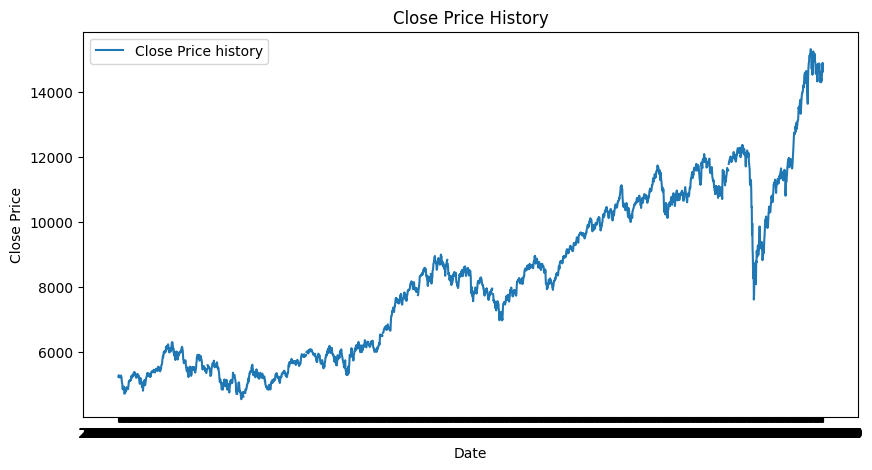

In [ ]:
import matplotlib.pyplot as plt
data_large=df
# Print some basic statistics about the data
print(data_large['Close'].describe())

# Plot the 'Close' prices over time
plt.figure(figsize=(10, 5))
plt.plot(data_large['Date'], data_large['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### MAIN CODE ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense

from scipy.stats import mstats
df = pd.read_csv('/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')
df = df.interpolate(method='linear')  #adding missing data
Close=df[['Close']]
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ds = Close.values
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step:i+step+2, 0])
    return np.array(Xtrain), np.array(Ytrain)
#Taking 50 days price as one record for training
time_stamp = 50
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
#Creating LSTM model using keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [2]:

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32)


Epoch 1/200
58/58 [==============================] - 11s 11ms/step - loss: 0.0048
Epoch 2/200
58/58 [==============================] - 1s 10ms/step - loss: 3.8892e-04
Epoch 3/200
58/58 [==============================] - 1s 10ms/step - loss: 3.6653e-04
Epoch 4/200
58/58 [==============================] - 1s 10ms/step - loss: 3.6487e-04
Epoch 5/200
58/58 [==============================] - 1s 10ms/step - loss: 3.8028e-04
Epoch 6/200
58/58 [==============================] - 1s 10ms/step - loss: 3.3547e-04
Epoch 7/200
58/58 [==============================] - 1s 10ms/step - loss: 3.4224e-04
Epoch 8/200
58/58 [==============================] - 1s 10ms/step - loss: 3.2914e-04
Epoch 9/200
58/58 [==============================] - 1s 10ms/step - loss: 2.8714e-04
Epoch 10/200
58/58 [==============================] - 1s 10ms/step - loss: 2.8589e-04
Epoch 11/200
58/58 [==============================] - 1s 10ms/step - loss: 2.8322e-04
Epoch 12/200
58/58 [==============================] - 1s 10ms/step

In [ ]:
model.save("trained_model.h5")


In [ ]:

# Step 2: Get the model's predictions on the test data
predictions = model.predict(X_test)

predictions=normalizer.inverse_transform(predictions)
# Step 4: Perform inverse scaling on y_test too, to bring it back to original scale for comparison
y_tests = normalizer.inverse_transform(y_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_tests.reshape(-1), predictions.reshape(-1))
directional_accuracy = np.mean(np.sign(y_tests[1:] - y_tests[:-1]) == np.sign(predictions[1:] - predictions[:-1])) * 100

# Print directional accuracy
print("Directional Accuracy:", directional_accuracy)

print("Mean Squared Error:", rmse)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close

    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')


def predict_func(data):
    """
    Modify this function to predict closing prices for next 2 samples.
    Take care of null values in the sample_input.csv file which are listed as NAN in the dataframe passed to you
    Args:
        data (pandas Dataframe): contains the 50 continuous time series values for a stock index

    Returns:
        list (2 values): your prediction for closing price of next 2 samples
    """
    # Load the saved model
    model = load_model("/content/trained_model (6).h5")
    df =pd.read_csv("/content/sample_input.csv")

    df = df.interpolate(method='linear')
    Close=df[['Close']]
    ds = Close.values

    #Using MinMaxScaler for normalizing data between 0 & 1
    normalizer = MinMaxScaler(feature_range=(0,1))
    ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

    fut_inp = ds_scaled
    fut_inp = fut_inp.reshape(1,-1)
    tmp_inp = list(fut_inp)
    #Creating list of the last 50 data
    tmp_inp = tmp_inp[0].tolist()


    #Predicting next 2 days price suing the current data
    lst_output=[]
    i=0

    while(i<2):
        fut_inp = fut_inp.reshape((1, 50,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        fut_inp = np.array(tmp_inp[1:])
    x=normalizer.inverse_transform(lst_output)
    y=np.zeros(2)
    y[0]=x[0][0]
    y[1]=x[1][0]
    return y

if __name__== "__main__":
    evaluate()

Mean Square Error: 3976.083095
Directional Accuracy: 50.0
